# Методы оптимизации. Задание №2.

## Выполнил Коновалов Илья (группа 19.Б05-пу)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from time import time 
from math import *

In [3]:
P1 = len("Коновалов") # 9
P2 = len("Илья")      # 4
Q1 = len("Олегович")  # 8
Q2 = P2               # 4 

P = complex(P1, P2)
Q = complex(Q1, Q2)

PRECISION = 1.e-11 * 5

In [4]:
call_count = 0

def drop_call_counter():
    global call_count
    call_count = 0

In [5]:
def polynom(x, y):
    z = complex(x, y)
    return z**2 + P*z + Q

def function(x, y):
    global call_count
    call_count += 1
    return abs(polynom(x, y))**2

def df_x(x, y):
    global call_count
    call_count += 1
    return 2*((x**2 - y**2 + x*P1 - y*P2 + Q1)*(2*x + P1) + (2*x*y + y*P1 + x*P2 + Q2)*(2*y + P2))

def df_y(x, y):
    global call_count
    call_count += 1
    return 2*((2*x*y + y*P1 + x*P2 + Q2)*(2*x + P1) - (x**2 - y**2 + x*P1 - y*P2 + Q1)*(2*y + P2))

def get_complex_pair(z):
    p = np.array([1 + 0.j, P, Q])
    first = np.array([1 + 0.j, -z])
    second = np.polydiv(p, first)
    return -second[0][1]

# Линии уровня функции |f(z)|^2

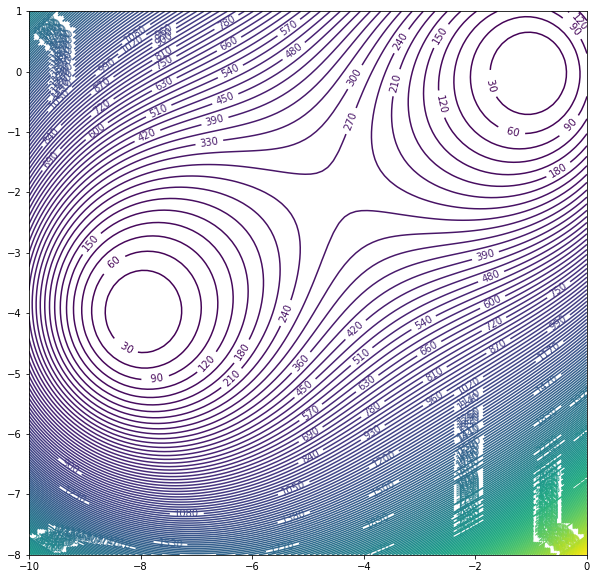

In [6]:
def show_contours():
    amount = np.int(100)
    x = np.linspace(-10, 0, amount)  
    y = np.linspace(-8, 1, amount)
    x,y = np.meshgrid(x,y)
    func = np.vectorize(function)
    z = func(x, y)
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot()
    cs = ax.contour(x, y, z, levels = 200)
    ax.clabel(cs, fmt = "%3.0f")
    plt.show()

show_contours()

# Метод покоординатного спуска

In [7]:
def coordinate_descent(a=10, b=10):
    iterations = 0
    start_time = time()
    delta = 5 * 10 ** (-6)
    step_RE = 5
    step_IM = 5
    f_abs = function(a, b)
    print("{}) Re={:.5f}, Im={:.5f} (|f|^2 = {})\n".format(iterations, a, b, f_abs))
    while fabs(step_RE) > delta and fabs(step_IM) > delta:
        count_RE = 0
        count_IM = 0
        flag_changed = False
        while True:
            iterations += 1
            new_point = a + step_RE
            f_new_point = function(new_point, b)
            print("\n{}) Минимизируем действительную часть (шаг={}) [{}]".
                  format(iterations, step_RE, call_count))
            print("\tТекущая точка: Re={:.5f}, Im={:.5f} (|f|^2={})".
                  format(a, b, f_abs))
            print("\tНовая точка  : Re={:.5f}, Im={:.5f} (|f|^2={})".
                  format(new_point, b, f_new_point))
            if f_new_point < f_abs:
                a = new_point
                f_abs = f_new_point
                count_RE += 1
            elif not flag_changed and count_RE == 0:
                step_RE *= -1
                flag_changed = True
            else:
                step_RE /= 2
                print("  Уменьшаем действительный шаг")
                break
        flag_changed = False
        while True:
            iterations += 1
            print("\n{}) Минимизируем мнимую часть (шаг={}) [{}]".
                  format(iterations, step_IM, call_count))
            new_point = b + step_IM
            f_new_point = function(a, new_point)
            print("\tТекущая точка: Re={:.5f}, Im={:.5f} (|f|^2 = {})".
                  format(a, b, f_abs))
            print("\tНовая точка  : Re={:.5f}, Im={:.5f} (|f|^2 = {})".
                  format(a, new_point, f_new_point))
            if f_new_point < f_abs:
                b = new_point
                f_abs = f_new_point
                count_IM += 1
            elif not flag_changed and count_IM == 0:
                step_IM *= -1
                flag_changed = True
            else:
                step_IM /= 2
                print("  Уменьшаем мнимый шаг")
                break
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    return complex(a, b)

drop_call_counter()
res1 = coordinate_descent()
res2 = get_complex_pair(res1)
print("\nРезультат:\nRe = {:.5f}, Im = {:.5f}\nRe = {:.5f}, Im = {:.5f}".
      format(res1.real, res1.imag, res2.real, res2.imag))

0) Re=10.00000, Im=10.00000 (|f|^2 = 114919.99999999999)


1) Минимизируем действительную часть (шаг=5) [2]
	Текущая точка: Re=10.00000, Im=10.00000 (|f|^2=114919.99999999999)
	Новая точка  : Re=15.00000, Im=10.00000 (|f|^2=258100.0)

2) Минимизируем действительную часть (шаг=-5) [3]
	Текущая точка: Re=10.00000, Im=10.00000 (|f|^2=114919.99999999999)
	Новая точка  : Re=5.00000, Im=10.00000 (|f|^2=49640.0)

3) Минимизируем действительную часть (шаг=-5) [4]
	Текущая точка: Re=5.00000, Im=10.00000 (|f|^2=49640.0)
	Новая точка  : Re=0.00000, Im=10.00000 (|f|^2=26259.999999999996)

4) Минимизируем действительную часть (шаг=-5) [5]
	Текущая точка: Re=0.00000, Im=10.00000 (|f|^2=26259.999999999996)
	Новая точка  : Re=-5.00000, Im=10.00000 (|f|^2=23779.999999999996)

5) Минимизируем действительную часть (шаг=-5) [6]
	Текущая точка: Re=-5.00000, Im=10.00000 (|f|^2=23779.999999999996)
	Новая точка  : Re=-10.00000, Im=10.00000 (|f|^2=36199.99999999999)
  Уменьшаем действительный шаг

6) Минимизир

# Градиентный спуск с дроблением шага

In [8]:
def gradient_descent_split_step():
    iterations = 0
    start_time = time()
    alpha = 10
    e = 0.5
    x = np.array([10., 10.])
    x_k = np.array([10., 10.])
    f_abs = function(*x_k)
    while f_abs > PRECISION:
        print("{}) Re={:.5f} Im={:.5f} (|f|^2={}) alpha={:.3f} [{}]".
              format(iterations, *x_k, f_abs, alpha, call_count))
        iterations += 1
        gr_x = df_x(*x_k)
        gr_y = df_y(*x_k)
        x[0] = x_k[0] - alpha * gr_x
        x[1] = x_k[1] - alpha * gr_y
        f_abs_new = function(*x)
        if f_abs_new - f_abs <= - alpha * e * (gr_x + gr_y):
            x_k = x
            f_abs = f_abs_new
        else:
            alpha *= 0.1
    print("{}) Re={:.5f} Im={:.5f} (|f|^2={}) alpha={:.3f} [{}]".
          format(iterations, *x_k, f_abs, alpha, call_count))
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    return complex(*x)

drop_call_counter()
res1 = gradient_descent_split_step()
res2 = get_complex_pair(res1)
print("\nРезультат:\nRe = {:.5f}, Im = {:.5f}\nRe = {:.5f}, Im = {:.5f}".
      format(res1.real, res1.imag, res2.real, res2.imag))

0) Re=10.00000 Im=10.00000 (|f|^2=114919.99999999999) alpha=10.000 [1]
1) Re=10.00000 Im=10.00000 (|f|^2=114919.99999999999) alpha=1.000 [4]
2) Re=10.00000 Im=10.00000 (|f|^2=114919.99999999999) alpha=0.100 [7]
3) Re=10.00000 Im=10.00000 (|f|^2=114919.99999999999) alpha=0.010 [10]
4) Re=10.00000 Im=10.00000 (|f|^2=114919.99999999999) alpha=0.001 [13]
5) Re=-9.39600 Im=-6.58800 (|f|^2=984.7961467136055) alpha=0.001 [16]
6) Re=-8.93281 Im=-5.88455 (|f|^2=431.36879055836636) alpha=0.001 [19]
7) Re=-8.68065 Im=-5.46481 (|f|^2=231.823364982544) alpha=0.001 [22]
8) Re=-8.51962 Im=-5.17598 (|f|^2=137.74743258735793) alpha=0.001 [25]
9) Re=-8.40815 Im=-4.96287 (|f|^2=86.96102697421938) alpha=0.001 [28]
10) Re=-8.32704 Im=-4.79889 (|f|^2=57.16717552988619) alpha=0.001 [31]
11) Re=-8.26594 Im=-4.66917 (|f|^2=38.67847962828696) alpha=0.001 [34]
12) Re=-8.21873 Im=-4.56449 (|f|^2=26.733966248737655) alpha=0.001 [37]
13) Re=-8.18153 Im=-4.47879 (|f|^2=18.782198506880963) alpha=0.001 [40]
14) Re=-8.

# Градиентный спуск с постоянным шагом

In [9]:
def gradient_descent_const_step():
    iterations = 0
    start_time = time()
    alpha = 1.e-2
    print("alpha =", alpha)
    x_k = np.array([0., 0.])
    f_abs = function(x_k[0], x_k[1])
    while f_abs > PRECISION:
        print("{}) Re={:.5f} Im={:.5f} (|f|^2={}) [{}]".
              format(iterations, *x_k, f_abs, call_count))
        iterations += 1
        gr_x = df_x(*x_k)
        gr_y = df_y(*x_k)
        x_k[0] -= alpha * gr_x
        x_k[1] -= alpha * gr_y
        f_abs = function(*x_k)
    print("{}) Re={:.5f} Im={:.5f} (|f|^2={}) [{}]".
          format(iterations, *x_k, f_abs, call_count))
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    return complex(*x_k)

drop_call_counter()
res1 = gradient_descent_const_step()
res2 = get_complex_pair(res1)
print("\nРезультат:\nRe = {:.5f}, Im = {:.5f}\nRe = {:.5f}, Im = {:.5f}".
      format(res1.real, res1.imag, res2.real, res2.imag))

alpha = 0.01
0) Re=0.00000 Im=0.00000 (|f|^2=80.00000000000001) [1]
1) Re=-1.76000 Im=-0.08000 (|f|^2=31.713535999999984) [4]
2) Re=-1.00746 Im=-0.03890 (|f|^2=0.10132463425559976) [7]
3) Re=-0.99804 Im=0.01122 (|f|^2=0.008451875951627844) [10]
4) Re=-1.00061 Im=-0.00340 (|f|^2=0.0007768152056215589) [13]
5) Re=-0.99982 Im=0.00102 (|f|^2=6.946407806950234e-05) [16]
6) Re=-1.00005 Im=-0.00031 (|f|^2=6.263785970097697e-06) [19]
7) Re=-0.99998 Im=0.00009 (|f|^2=5.634153291849849e-07) [22]
8) Re=-1.00000 Im=-0.00003 (|f|^2=5.071615836001741e-08) [25]
9) Re=-1.00000 Im=0.00001 (|f|^2=4.564217167720124e-09) [28]
10) Re=-1.00000 Im=-0.00000 (|f|^2=4.107859459088057e-10) [31]
11) Re=-1.00000 Im=0.00000 (|f|^2=3.697056230332441e-11) [34]

Количество итераций: 11
Количество вызовов функции: 34
Затраченное время (миллисекунды): 1.112

Результат:
Re = -1.00000, Im = 0.00000
Re = -8.00000, Im = -4.00000


# Градиентный спуск с заранее заданным шагом

In [11]:
def gradient_descent_sequent_step():
    iterations = 0
    start_time = time()
    x_k = np.array([0., 0.])
    f_abs = function(x_k[0], x_k[1])
    abs_gr = 0
    while f_abs > PRECISION:
        print("{}) Re={:.5f} Im={:.5f} (|f|^2={}) [{}]".
              format(iterations, *x_k, f_abs, call_count))
        iterations += 1
        gr_x = df_x(*x_k)
        gr_y = df_y(*x_k)
        abs_gr = np.sqrt(gr_x**2 + gr_y**2)
        x_k[0] -= 5/iterations * gr_x / abs_gr
        x_k[1] -= 5/iterations * gr_y / abs_gr
        f_abs = function(*x_k)
    print("{}) Re={:.5f} Im={:.5f} (|f|^2={}) [{}]".
          format(iterations, *x_k, f_abs, call_count))
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    return complex(*x_k)

drop_call_counter()
res1 = gradient_descent_sequent_step()
res2 = get_complex_pair(res1)
print("\nРезультат:\nRe = {:.5f}, Im = {:.5f}\nRe = {:.5f}, Im = {:.5f}".
      format(res1.real, res1.imag, res2.real, res2.imag))

0) Re=0.00000 Im=0.00000 (|f|^2=80.00000000000001) [1]
1) Re=-4.99484 Im=-0.22704 (|f|^2=372.4993471471911) [4]
2) Re=-3.41745 Im=-2.16658 (|f|^2=256.72151982782987) [7]
3) Re=-2.91409 Im=-0.57774 (|f|^2=150.21991247040373) [10]
4) Re=-1.67895 Im=-0.38552 (|f|^2=32.32120364659261) [13]
5) Re=-0.80918 Im=0.10793 (|f|^2=3.29620895708242) [16]
6) Re=-1.53448 Im=-0.30242 (|f|^2=20.920955139617433) [19]
7) Re=-0.91266 Im=0.04908 (|f|^2=0.6686855344712639) [22]
8) Re=-1.45750 Im=-0.25715 (|f|^2=15.648267953789786) [25]
9) Re=-0.97305 Im=0.01479 (|f|^2=0.06188836379335136) [28]
10) Re=-1.41139 Im=-0.22576 (|f|^2=12.695889371256229) [31]
11) Re=-1.01264 Im=-0.00756 (|f|^2=0.014043534535733605) [34]
12) Re=-0.65508 Im=0.20637 (|f|^2=11.57413164105442) [37]
13) Re=-0.98530 Im=0.00918 (|f|^2=0.019602918710013663) [40]
14) Re=-1.28822 Im=-0.18001 (|f|^2=6.886877922139658) [43]
15) Re=-1.00583 Im=-0.00290 (|f|^2=0.0027514372843140096) [46]
16) Re=-0.72607 Im=0.13635 (|f|^2=6.555853614548254) [49]
1